In [51]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
import pandas as pd


In [52]:
data = pd.read_csv("/content/heart.csv")
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [53]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()
data["HeartDisease"]=encode.fit_transform(data["HeartDisease"])
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [55]:
x=data[data.columns[3:8]][:920]
x


,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR
0,140,289,0,Normal,172
1,160,180,0,Normal,156
2,130,283,0,ST,98
3,138,214,0,Normal,108
4,150,195,0,Normal,122
...,...,...,...,...,...
913,110,264,0,Normal,132
914,144,193,1,Normal,141
915,130,131,0,Normal,115
916,130,236,0,LVH,174


In [56]:
y=data["HeartDisease"][:920]

In [57]:
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2,random_state=24)


In [60]:
# Assuming 'data' is your original DataFrame
x=data[data.columns[3:8]][:920]

# Identify columns with non-numeric data
categorical_cols = x.select_dtypes(include=['object']).columns

# Import necessary library
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    x[col] = le.fit_transform(x[col])
    label_encoders[col] = le  # Store encoders for potential later use

x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2,random_state=24)

# Now convert to NumPy array
x_train = np.array(x_train, dtype=float) # The categorical features have been encoded, so this should work now.

In [61]:
x_train = np.array(x_train, dtype=float)

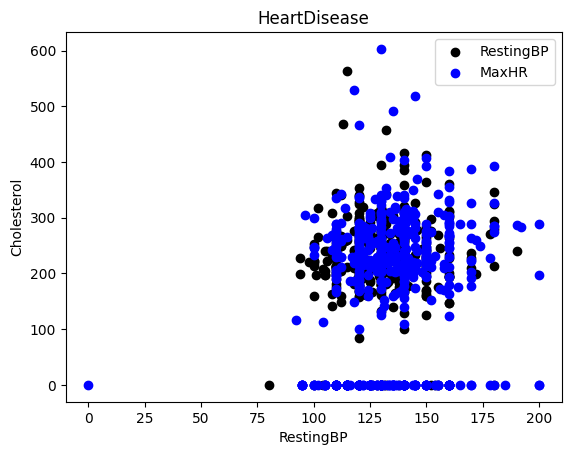

In [62]:
plt.scatter(x[y==0]["RestingBP"],x[y==0]["Cholesterol"], color='Black', label='RestingBP')
plt.scatter(x[y==1]["RestingBP"],x[y==1]["Cholesterol"], color='blue', label='MaxHR') # Use column names to index DataFrame
plt.title('HeartDisease')
plt.xlabel('RestingBP')
plt.ylabel('Cholesterol')
plt.legend()
plt.show()

In [63]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
n_hidden=50
n_epochs=1000
learning_rate=1
weights_hidden=np.random.normal(0.0,size=(x_train.shape[1],n_hidden))
weights_output=np.random.normal(0.0,size=(n_hidden))
hist_loss=[]
hist_accuracy=[]
print(weights_hidden)
print(weights_output)

[[ 2.73878361e+00  1.29854399e-01 -2.94605525e-01 -1.50027230e+00
   1.41970341e-01  1.37676666e+00  8.91789202e-01  9.98290436e-02
  -2.05451912e+00 -1.62253193e-01  1.11623047e+00  5.10146034e-01
   1.54525920e-01 -1.50604221e-01  8.10677996e-01  1.01314809e+00
  -1.18330099e+00  8.65581635e-01 -4.62780834e-01 -2.04144878e-01
  -4.39162040e-01 -7.18001451e-01  2.15206277e-01  1.53062373e+00
   2.07623754e-01  4.80816834e-01  1.65345235e+00  2.24834742e+00
  -7.28318730e-01 -2.84297569e-01  1.61363614e+00  1.36544896e+00
   1.02067305e+00 -6.32272213e-01 -1.02110192e+00  1.01014159e+00
  -1.77167505e-02  9.93657796e-02  9.57451757e-02  2.33054280e+00
  -1.21016788e+00  7.15101547e-02 -7.71394885e-01  3.35551192e-02
  -5.73518214e-01  7.02409661e-01 -4.17313268e-01 -8.74559772e-01
   1.14644207e+00  6.36198282e-01]
 [-7.74317702e-01 -3.80729013e-01  1.68882199e-02 -1.38661842e-01
  -1.45423674e-01  8.74968633e-01  1.78490178e-01 -2.30246320e+00
  -3.23555571e-01 -8.69657553e-01 -1.3884

In [65]:
for i in range(n_epochs):
    del_w_hidden=np.zeros(weights_hidden.shape)
    del_w_output=np.zeros(weights_output.shape)

    # Use x_train (lowercase) instead of X_train
    for x1,y1 in zip(x_train,y_train):
        hidden_input=np.dot(x1,weights_hidden)
        hidden_output=sigmoid(hidden_input)
        output_summation=np.dot(hidden_output,weights_output)
        output_activation=sigmoid(output_summation)

        error=y1-output_activation
        output_error=error*output_activation*(1-output_activation)
        hidden_error=np.dot(output_error,weights_output)*hidden_output*(1-hidden_output)
        del_w_hidden+=hidden_error*x1[:,None]
        del_w_output+=output_error*hidden_output

    # Use x_train (lowercase) instead of X_train
    weights_hidden+=learning_rate*del_w_hidden/x_train.shape[0]
    weights_output+=learning_rate*del_w_output/x_train.shape[0]

    if i%100==0:
        # Use x_val (lowercase) instead of X_val
        hidden_output=sigmoid(np.dot(x_val,weights_hidden))
        out=sigmoid(np.dot(hidden_output,weights_output))
        loss=np.mean((out-y_val)**2)
        predictions=out>0.5
        accuracy=np.mean(predictions==y_val)
        print(f'Epoch {i}, Loss: {loss.round(4)}, Accuracy: {accuracy}')

<ipython-input-63-48d606de8200>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


Epoch 0, Loss: 0.4727, Accuracy: 0.5271739130434783
Epoch 100, Loss: 0.4727, Accuracy: 0.5271739130434783
Epoch 200, Loss: 0.4727, Accuracy: 0.5271739130434783
Epoch 300, Loss: 0.4727, Accuracy: 0.5271739130434783
Epoch 400, Loss: 0.4726, Accuracy: 0.5271739130434783
Epoch 500, Loss: 0.4726, Accuracy: 0.5271739130434783
Epoch 600, Loss: 0.472, Accuracy: 0.5271739130434783
Epoch 700, Loss: 0.4277, Accuracy: 0.5271739130434783
Epoch 800, Loss: 0.2141, Accuracy: 0.6684782608695652
Epoch 900, Loss: 0.2029, Accuracy: 0.7282608695652174
